目录：
* 实现坐标下降法

# 坐标下降法简介
每次循环优化一个变量，将问题转化为一元函数求极值，达到函数的极小值点。  
对于一个变量的优化问题，可以采用牛顿法也可以直接用公式解。

优势：  
对于某些复杂的问题计算较为简便

劣势：  
若目标函数不光滑，则坐标下降法有可能陷入非驻点

# 实现坐标下降法
以函数
$f(x)=x_1^2+x_2^2为例$

优化单个变量时，采用梯度下降法  

梯度$\nabla f(x) = \begin{pmatrix}2x_1 \\2x_2\end{pmatrix}$

依此更新每个变量

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def dJ(x):
    return 2.0*x

def coordinate_descent(inital_x,maxiter=1e4,epsilon=1e-8,gamma=0.01):
    x_history = []
    x_history.append(inital_x.copy())
    x = inital_x
    i_iter = 0
    gradient = dJ(x)
    
    while i_iter < maxiter:
        for i in range(len(x)):
            x[i] = x[i] - gradient[i]*gamma
            x_history.append(x.copy())
            gradient = dJ(x)
            if np.linalg.norm(gradient) < epsilon:
                return np.array(x_history)
        i_iter += 1   
    return np.array(x_history)

def plot_x_history(inital_x):
    X1 = np.arange(-4,4,0.25)
    X2 = np.arange(-4,4,0.25)
    X1,X2 = np.meshgrid(X1,X2)
    Z = X1**2+X2**2
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X1,X2,Z,alpha=0.8)
    
    res = coordinate_descent(inital_x=inital_x,gamma=0.1)
    ax.plot(res[:,0],res[:,1],res[:,0]**2+res[:,1]**2,marker='o',color='r')
    plt.show()

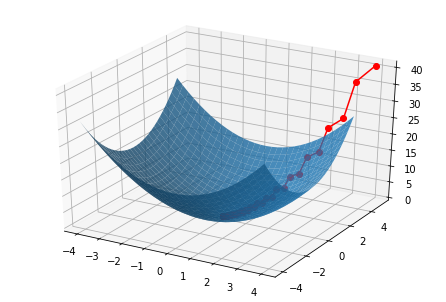

In [61]:
plot_x_history(np.array([4,5],dtype='float'))

在线性回归中使用坐标下降法，感觉并没有什么优势，毕竟对于线性回归来说，梯度什么的都很好求，之后在较为复杂的模型下尝试使用